### Instructions 

This homework is longer than the other ones - take time to get through it all! 

Work through each section and provide a well-commented response in one or more Python cells. I should be able to execute the notebook and obtain the same results that you show in the cell (_do not clear the cell outputs before uploading your final notebook to Git!_) 

Part of your grade (_see rubric_) is based on preparing a logical notebook that is easy to follow.

### Part 1: Short answer questions 

Explain in your own words the following concepts: 

* Residual squared error 
* Sum of squared residuals 
* $R^2$ statistic 

_note: I expect you to not simply read these definitions in ISL and modestly change the words. Please take a few minutes to read multiple definitions and come up with your own definition_ 

#### Residual Squared Error

The residual error is the difference between the error of all participants in a sample, from the error of the sample mean, or some other quantity of interest. The residual squared error is simply the square of this difference.

### Sum of squared residuals

The sum of squared residuals is the sum of the squared difference between an observable value and some estimated value of a qunatity of interest.

### R squared statistic

The R squared statistic is a measure of the accuracy of data that is fitted to a regression line

### Part 2: Logistic Regression

Implement both the linear and logistic regression models using sklearn, calculate the coefficients $\beta_0$ and $\beta_1$ and exactly (to the best of your ability) reproduce Figure 4.2 in the book.  

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

#### Reading the Default.xlsx file into a dataframe

In [53]:
data = pd.read_excel('Default.xlsx')

data.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


#### Resetting the index so that it starts at zero

In [54]:
data = data.reset_index()

data.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


#### Setting up the Probability of Default

 Pr(default = Yes|balance)

In [55]:
data['Probability of Default'] = None
for i in range(len(data)): 
    if data.loc[i, ('default')] == 'Yes':
        data.loc[i, ('Probability of Default')] = 1 #return value of 1 if the default is Yes
    else:
        data.loc[i, ('Probability of Default')] = 0 #return value of 0 if the Default is No

In [56]:
data.head()

,index,default,student,balance,income,Probability of Default
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,0
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0


#### Implementing the Linear Regression Model

In [57]:
lin_regr= sklearn.linear_model.LinearRegression()

# Data must be reshaped because we need to feed in a 1D array
x = data['balance'].values.reshape(-1,1) # x-axis is the balance column on figure 4.2
y = data['Probability of Default'].values.reshape(-1,1) # y-axis is the probability of default on figure 4.2

linear_fit = lin_regr.fit(x, y.ravel())
linear_prediction = lin_regr.predict(x)

# For the linear regression coefficient
lin_regr_coef = lin_regr.coef_

lin_regr_coef

array([0.00012987])

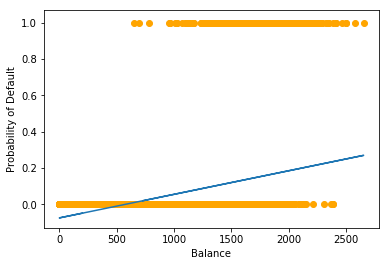

In [58]:
# Plotting the linear regression

fig = plt.figure
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.scatter(x, y, color = 'orange')
plt.plot(x, linear_prediction) 

#### Implementing the Logistic Regression

In [59]:
log_regr = sklearn.linear_model.LogisticRegression()

# reshaping the values again
data = data.sort_values('balance')
x = data['balance'].values.reshape(-1,1)
y = data['Probability of Default'].values.reshape(-1,1)

logistic_fit = log_regr.fit(x, y.ravel())
logistic_prediction = log_regr.predict_proba(x)[:,1]

# For the logistic regression coefficient
log_regr_coef = log_regr.coef_

log_regr_coef

/Users/studentuser/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.00478248]])

Text(0, 0.5, 'Probability of Default')

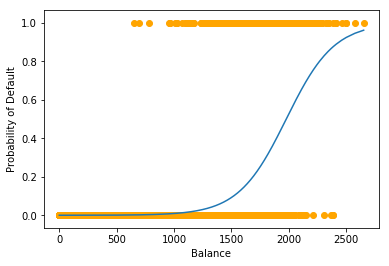

In [60]:
# Plotting the logistic regression
fig = plt.figure()
plt.scatter(x, y, color = 'orange')
plt.plot(x.reshape(-1,1), logistic_prediction)
plt.xlabel('Balance')
plt.ylabel('Probability of Default')

### Part 3: Simple Linear Regression

1. Make sure you understand all the components of the SLR model Chad showed in class and code the same thing yourself 

2. Generate a separate set of training data (25 points) and validation data (15 poins).  Each data set should have the same amount of irreducible error (random noise term) applied to it

3. Make a plot of the error in the testing data as a function of the random strength. There is no "one answer" for this part, open ended graded based on creativity and quality of results 

4. For the exact example I showed in class, calculate the RSE, SSR, $R^2$, 95% confidence intervals for both $\beta_i$, and evaluate the P-value at 0.05 significance level for $\beta_1$

5. Explain in plain language the meaning of the P-value test 

#### Starting with the code given in L7_Regression and modifying slightly

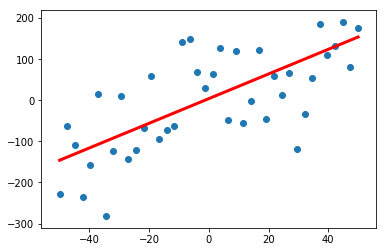

In [61]:
#model: Y = 3X + 4
#size of training data and scale of random noise 
pts=40 # 25 points + 15 points = 40 total 
noisescale=.25 
x=np.linspace(-50,50,num=pts)
B0=4
B1=3
yactual=B0+B1*x
np.random.seed(123) #for reproducible 
#add noise scaled to 25% of range to data
yrand=yactual+noisescale*(yactual.max()-yactual.min())*np.random.normal(size=pts)

# Plotting
plt.plot(x,yactual,color='red',lw='3')
plt.scatter(x,yrand)

B0, B1:  [-2.25352499] [2.76248635]


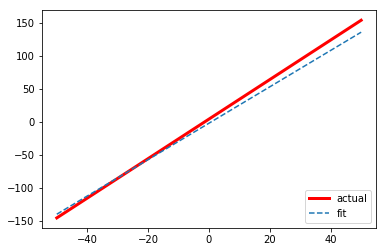

In [62]:
#Naming the regression variable and reshaping
regr = sklearn.linear_model.LinearRegression() 
regr.fit(x.reshape(-1,1),yrand.reshape(-1,1))
print('B0, B1: ',regr.intercept_, regr.coef_[0])

# Plotting regression
plt.plot(x,yactual,color='red',lw='3',label='actual')
plt.plot(x,regr.predict(x.reshape(-1,1)),ls='--',label='fit')
plt.legend(loc='lower right')

#### Plot of error in the testing data as a function of the random strength

Text(0, 0.5, 'Mean Squared Error')

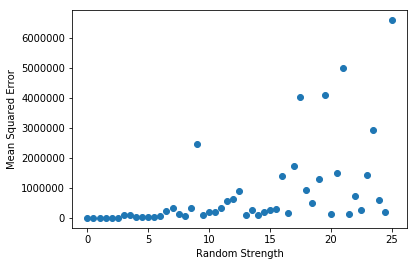

In [63]:
# Creating empty numpy array of mean squared error
MSE = np.empty([51])

# Spacing of random strength (noise) of the training data 
rand_noise = np.linspace(0, 25, num = 51)

# For loop for generating mean squared error based on each random noise value
for noise in range(len(rand_noise)):
    #model: Y = 3X + 4
    #size of training data and scale of random noise 
    pts=40 # 25 points + 15 points = 40 total 
    noisescale = rand_noise[noise] 
    x=np.linspace(-50,50,num=pts)
    B0=4
    B1=3
    yactual=B0+B1*x
    yrand=yactual+noisescale*(yactual.max()-yactual.min())*np.random.normal(size=pts)
    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x.reshape(-1,1),yrand)
    yfit = regr.predict(x.reshape(-1,1))
    MSE[noise] = mean_squared_error(yactual, yfit)
    
#plotting
plt.scatter(rand_noise, MSE)
plt.xlabel('Random Strength')
plt.ylabel('Mean Squared Error')

#### Calculating the RSE, SSR,  𝑅2 , 95% confidence intervals for both  𝛽𝑖 , and evaluating the P-value at 0.05 significance level for  𝛽1, once again from the example in L7_Regression.

In [64]:
# Splitting the testing and training data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, yrand, test_size=15/40)

# Code frome xample
pts = 25
noisescale = 0.25
x = np.linspace(-50, 50, num=pts)
B0 = 4
B1 = 3
yactual = B0 + B1*x
yrand = yactual + noisescale*(yactual.max() - yactual.min())*np.random.normal(size=pts)
regr = sklearn.linear_model.LinearRegression()

#Regression fit and y prediction
regr.fit(x_train.reshape(-1, 1), y_train)
y_prediction = regr.predict(x_test.reshape(-1, 1))

#Calculating RSE
n = len(y_prediction)
RSE = mean_squared_error(y_test, y_prediction)*n*(1/(n+2))**(.5)
print('RSE = ', RSE)
                                                       
#Calculating SSR
SSR = ((y_test - y_prediction)**2).sum()
print('SSR =', SSR)

#Calculating the R squared value
r_squared = r2_score(y_test, y_prediction)
print('R squared value =', r_squared)

#Need the standard error to find confidence inetrval
std_error = (SSR/(n-2)/np.sum((x_train - x_train.mean())**2))**0.5
print('Standard error =', std_error)

# Calculating 95% confidence inetrvals, with a P value of 0.05
t_test = scipy.stats.t.ppf(1-0.05, n-1)
CI = t_test * std_error
print('Confidence interval =', CI)

# Regression intercepts and coefficients, Bo and B1
B0 = regr.intercept_
B1 = regr.coef_[0]
print('B0 =', B0)
print('B1 =', B1)

RSE =  247264167.5959851
SSR = 1019496280.4286743
R squared value = -0.436142242837781
Standard error = 67.20957588608105
Confidence interval = 118.37690722928392
B0 = -793.4017239892577
B1 = 92.05413646571019


### Part 4: Multiple Linear Regression
1. The code below (next cell) can be used with the Harvard dataset (HCEPD_100K.csv) used in DSMCER HW2 - it is based on the MLSR of the harvard data. Some information: 
    * Your colleague gives you this code makes a 3x1 composite plot  
    * They were trying to look at individual effects ($X_i$) values vs. the PCE to try and understand how important the individual $\beta_i$ are  
    * This approach is clearly wrong, both in concept as well as in code execution. Offer some explanations why. 
    * In CH3 of ISL, the F-test is explained for the multiple linear regression case. Calculate the F-statistics and explain in plain language the conclusion
    * Calculate the p-values for each of the $\beta$ values

#### Importing the HCEPD dataset

In [72]:
harvard = pd.read_csv('HCEPD_100K.csv')

harvard.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


In [73]:
harvard.shape

(99999, 11)

#### Implementing the collegues code

[[1.80746215e-03 6.90543119e-06 8.44863095e-06]]
[3.43921971]


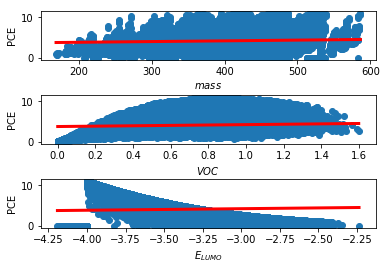

In [88]:
# generate matrix X to make predictions of PCE over the X parameter space 
pts=99999
X=np.zeros((pts,3))
X[:,0]=np.linspace(harvard.mass.min(),harvard.mass.max(),pts)
X[:,1]=np.linspace(harvard.voc.min(),harvard.voc.max(),pts)
X[:,2]=np.linspace(harvard.e_lumo_alpha.min(),harvard.e_lumo_alpha.max(),pts)

# Performing the regression
regr2 = sklearn.linear_model.LinearRegression()
regr2.fit(X, harvard['pce'].values.reshape(-1,1))
y_prediction = regr2.predict(X)

# plot the predicted data 
plt.subplot(311)
plt.scatter(harvard.mass,harvard.pce)
plt.plot(X[:,0],regr2.predict(X),color='red',lw='3')
plt.ylabel('PCE')
plt.xlabel('$mass$')

plt.subplot(312)
plt.scatter(harvard.voc,harvard.pce)
plt.plot(X[:,1],regr2.predict(X),color='red',lw='3')
plt.ylabel('PCE')
plt.xlabel('$VOC$')

plt.subplot(313)
plt.scatter(harvard.e_lumo_alpha,harvard.pce)
plt.plot(X[:,2],regr2.predict(X),color='red',lw='3')
plt.ylabel('PCE')
plt.xlabel('$E_{LUMO}$')

#adjusting space between subplots
plt.subplots_adjust( wspace = 0.1, hspace = 0.7)


print(regr2.coef_)
print(regr2.intercept_)


#### Our collegue's approach to this investigation has some certain flaws. It seems the values going into his matrix, X, that are serving to make predictions for pce are only based off of the maximum and minumum values. There is an extremely large quantity of data here that is not being used to make these predicitions.

#### Below we will generate a more appropriate X matrix that uses the entire data instead of just the minimum and maximum values.

In [89]:
pts = 99999
X_new = np.zeros((pts,3))
X_new[:, 0] = harvard['mass'].values
X_new[:, 1] = harvard['voc'].values
X_new[:, 2] = harvard['e_lumo_alpha'].values
Y_new = harvard['pce'].values

#### We can get the F statistcis by performing an OLS regression

In [96]:
new_approach = sm.OLS(Y_new, X_new).fit()
new_approach.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 2.368e+05
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:08:22   Log-Likelihood:            -1.9012e+05
No. Observations:               99999   AIC:                         3.803e+05
Df Residuals:                   99996   BIC:                         3.803e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0052      0.000    -51.077      0.000      -0.005      -0.005
x2             2.0761      0.021    100.687      0.000       2.036       2.117
x3            -1.5404      0.014   -111.641      0.000      -1.567      -1.513
==============================================================================
Omnibus:                     5855.838   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6942.952
Skew:                           0.626   Prob(JB):                         0.00
Kurtosis:                       3.316   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The F-statistic value here was 2.368 E+5. An F-statistic is a ratio of two variances, and in this case, we are taking the ratio of the variance of the sample means and the variance of all the samples themselves. The F_statistic we obtained is pretty high, and in this case we can reject the null hypothesis which should state that the sample means are equal. In turn, this tells us that the sample means vary more than the rest of the samples themselves

### Part 5: Resampling methods 

I would like you to write a clearly labeled function that performs bootstrapping using a subset of the HCEPD_100K.csv data. Your function should be versatile in terms of how much of the data is selected for the bootstrap and and how many iterations are run.  

1. Prepare a plot of MSE (using the same 3-parameter PCE fit (using mass/VOC/lumo features). The x-axis should be the number of bootstrap samples and the y-axis should be the MSE. You should show a line for boostrap samples sizes of 100, 1000, and 5000.  
    
2. For the same sampling you should show a plot the estimate of the three relevant beta coefficients 
    

#### Creating the bootstrapping function

In [103]:
def bootstrapping (df, quantity):
    """ This is a bootstrapping function that takes in a dataframe and the quantity of data for which to 
    perform the bootstrapping"""
    sampling = df.sample(quantity, replace=True, random_state=5000)
    reg = smf.ols('pce ~ mass + voc + e_lumo_alpha', sampling)
    model = reg.fit()
    return model

#### Writing a for loop to implement the same sizes on the bootstrapping function

In [104]:
# From the problem statement
sample_sizes = [100, 1000, 5000]

#Empty lists for which to append results
bootstrap_results = []
MSE = []
mass = []
voc = []
e_lumo =[]

# For loop
for sizes in sample_sizes:
    bootstrap_results.append(bootstrapping(harvard, sizes))
    MSE.append(bootstrap_results[-1].mse_model)
    mass.append(bootstrap_results[-1].params[1])
    voc.append(bootstrap_results[-1].params[2])
    e_lumo.append(bootstrap_results[-1].params[3])

#### Plotting MSE vs sample size

Text(0, 0.5, 'Mean Squared Error')

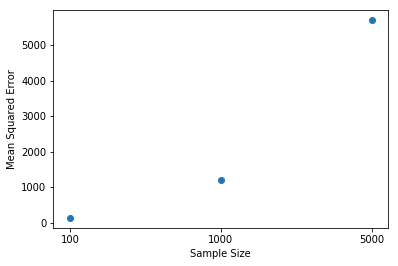

In [105]:
figure1 = plt.figure()
plt.scatter(np.arange(3), MSE)
plt.xticks(np.arange(3), sample_sizes)
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error')

#### Plotting the beta coefficients

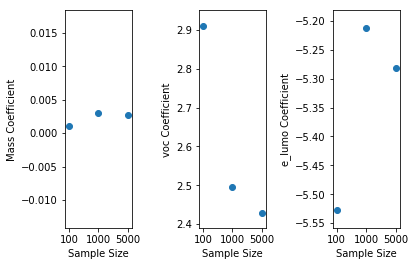

In [117]:
figure2 = plt.figure()

#mass coefficient
plt.subplot(1, 3, 1)
plt.scatter(np.arange(3), mass)
plt.xticks(np.arange(3), sample_sizes)
plt.xlabel('Sample Size')
plt.ylabel('Mass Coefficient')

#voc coefficient
plt.subplot(1, 3, 2)
plt.scatter(np.arange(3), voc)
plt.xticks(np.arange(3), sample_sizes)
plt.xlabel('Sample Size')
plt.ylabel('voc Coefficient')

#e_lumo coefficient
plt.subplot(1, 3, 3)
plt.scatter(np.arange(3), e_lumo)
plt.xticks(np.arange(3), sample_sizes)
plt.xlabel('Sample Size')
plt.ylabel('e_lumo Coefficient')

#adjusting space between subplots
plt.subplots_adjust( wspace = 1, hspace = 1.5)